<a href="https://colab.research.google.com/github/supercode-r/stable-elliptical-distribution/blob/main/Synthetic_mixture_of_alpha_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
from mpmath import gamma
from math import log
import math

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [ ]:
import rpy2
import numpy as np
import pandas as pd

In [ ]:
import rpy2.robjects
rpy2.robjects.r.version

R object with classes: ('simple.list',) mapped to:
<ListVector - Python:0x00000152B1651248 / R:0x00000152B7FB9390>
[StrVector, StrVector, StrVector, StrVector, ..., StrVector, StrVector, StrVector, StrVector]
  platform: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000152BA71EE48 / R:0x00000152B7FB4F20>
['x86_64-w64-mingw32']
  arch: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000152BA72E648 / R:0x00000152B7FB4EC0>
['x86_64']
  os: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000152BA71EF48 / R:0x00000152B7FB4E30>
['mingw32']
  system: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000152BA72E708 / R:0x00000152B7FB4DD0>
['x86_64, mingw32']
...
  major: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000152BA72E7C8 / R:0x00000152B7FB7B70>
['73796']
  minor: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000152BA72E848 / R:0x00000152B7FB7B10>
['R']
  year: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000152BA72E8C8 / R:0x00000152B7FB7AE0>
['R version 3.4.3 (2017-11-30)']
  month: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000152BA72E948 / R:0x00000152B7FB7AB0>
['Kite-Eating Tree']

In [ ]:
import rpy2.rinterface
rpy2.rinterface.initr()

0

In [ ]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

In [ ]:
# import R's utility package
utils = rpackages.importr('utils')

In [ ]:
utils.data

R object with classes: ('function',) mapped to:
<DocumentedSTFunction - Python:0x00000152BA9E7088 / R:0x00000152B90FECC0>

In [ ]:
# utils.remove_packages('stable')

In [ ]:
utils.install_packages('A:\BU Spring 2021\Thesis\stable_R\stable_5.3.zip')

rpy2.rinterface.NULL

In [ ]:
rstable = rpackages.importr('stable')
rstable.stable_version()

'STABLE 5.3.18 (2016/10/15) Serial #430 Copyrigh...


In [ ]:
import rpy2.robjects.numpy2ri as numpy2ri
numpy2ri.activate()

In [ ]:
# utils.remove_packages('Matrix')

In [ ]:
utils.install_packages('A:\BU Spring 2021\Thesis\Matrix_1.3-4')
# utils.install_packages('Matrix')

rpy2.rinterface.NULL

In [ ]:
rmatrix = rpackages.importr('Matrix')

## Data Generation

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
import pandas as pd
iris = datasets.load_iris()
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# data['class'].value_counts()
iris_df = pd.DataFrame({'x1':iris.data.T[0], 'x2': iris.data.T[1], 'target': iris.target.T})

sl = {} #sepal length for 3 flowers[0,1,2]
sw = {} #sepal width for 3 flowers[0,1,2]

i = 0
j = 0
for i in range(3):
    for j in range(2):
        j += 1
        if j == 1:
            sl[i] = np.asarray(iris_df[iris_df.target == i][[f'x{j}']])
        else:
            sw[i] = np.asarray(iris_df[iris_df.target == i][[f'x{j}']])


In [ ]:
# rstable.stable_fit(np.asarray(iris_df['x1']))
rstable.stable_fit(np.asarray(sl[0]))

1.999953,0.167944,0.246744,5.006000



Alpha = 2
Sepal length
Mean 5.843333333333334 
Std 0.828066127977863
Sepal width
Mean 3.0573333333333337 
Std 0.828066127977863
      x1   x2  target
0    5.1  3.5       0
1    4.9  3.0       0
2    4.7  3.2       0
3    4.6  3.1       0
4    5.0  3.6       0
..   ...  ...     ...
145  6.7  3.0       2
146  6.3  2.5       2
147  6.5  3.0       2
148  6.2  3.4       2
149  5.9  3.0       2

[150 rows x 3 columns]


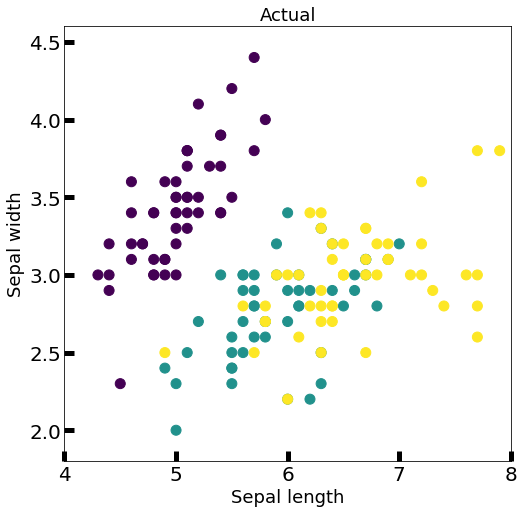

C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\

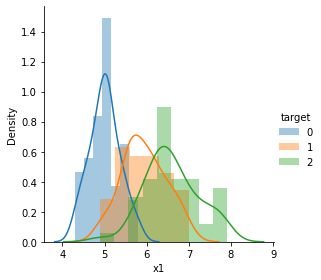

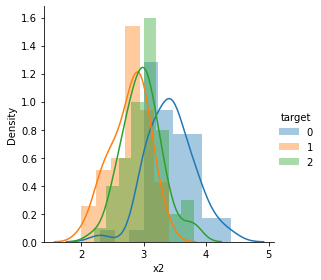


Alpha = 1.9
Sepal length
Mean 5.777623176285267 
Std 0.8455603581880088
Sepal width
Mean 3.0565902700430945 
Std 0.8455603581880088
           x1        x2  target
0    5.181228  3.385556       0
1    5.232567  3.377962       0
2    5.343014  3.124212       0
3    4.819428  3.953697       0
4    4.932097  3.342995       0
..        ...       ...     ...
145  6.007402  4.080977       2
146  7.548020  2.831501       2
147  6.102541  2.978350       2
148  6.437182  3.025507       2
149  6.083478  3.479825       2

[150 rows x 3 columns]


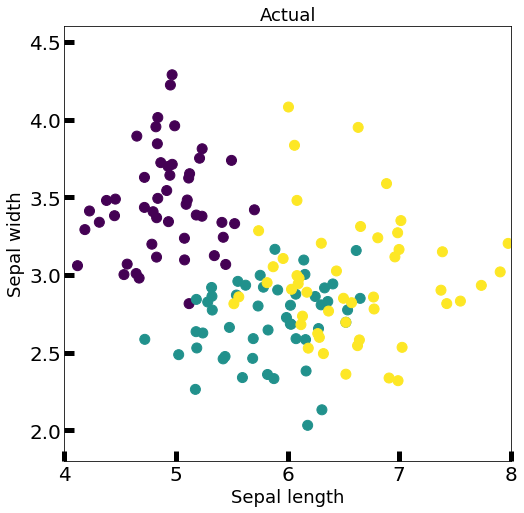

C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\

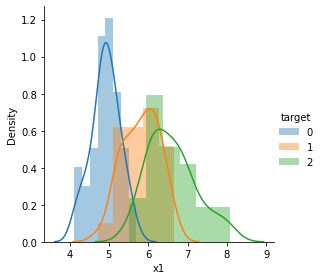

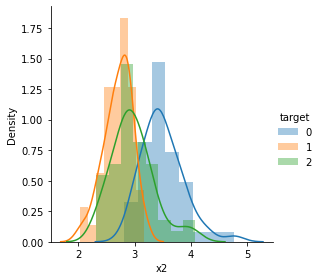


Alpha = 1.8
Sepal length
Mean 6.088882972294013 
Std 1.8449951379143363
Sepal width
Mean 3.068214161126833 
Std 1.8449951379143363
           x1        x2  target
0    5.007822  3.349469       0
1    5.640424  3.227506       0
2    4.861528  3.243853       0
3    5.037982  2.984070       0
4    5.121368  2.998274       0
..        ...       ...     ...
145  7.308107  2.648622       2
146  5.002521  2.908916       2
147  7.485241  3.309974       2
148  6.647139  3.154888       2
149  6.162553  2.564454       2

[150 rows x 3 columns]


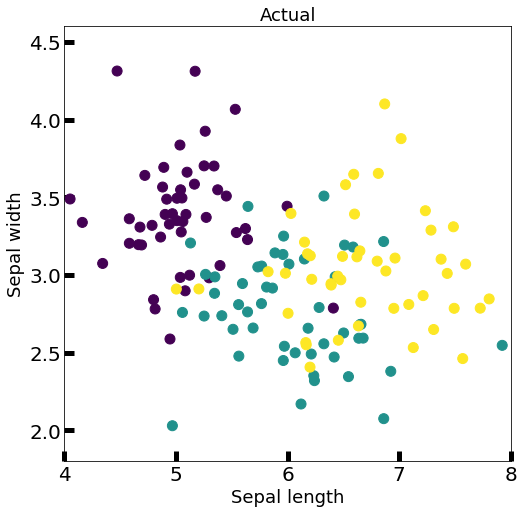

C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\

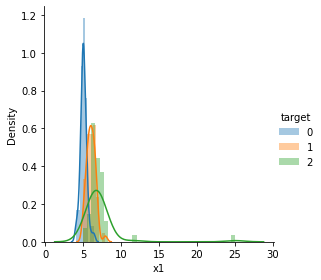

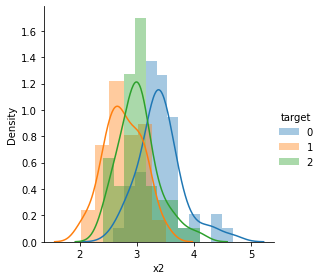


Alpha = 1.7
Sepal length
Mean 5.919396021725666 
Std 1.1244521773195266
Sepal width
Mean 3.111063810205796 
Std 1.1244521773195266
           x1        x2  target
0    4.956510  3.328541       0
1    5.428851  3.703585       0
2    4.914131  3.451792       0
3    5.290267  3.482998       0
4    5.394382  3.449430       0
..        ...       ...     ...
145  6.423772  2.824242       2
146  7.302046  2.494914       2
147  6.329062  3.361177       2
148  7.533098  3.428772       2
149  6.781279  2.458005       2

[150 rows x 3 columns]


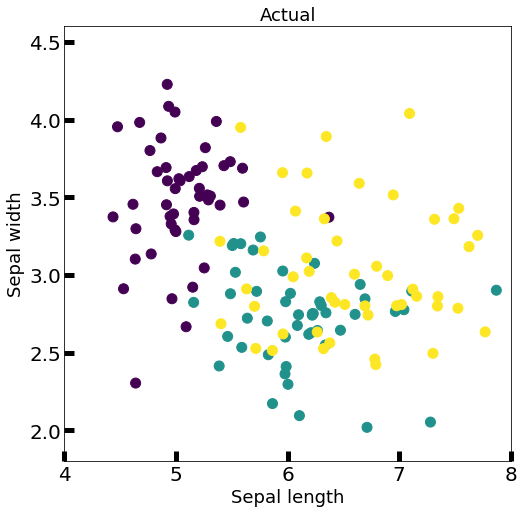

C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\

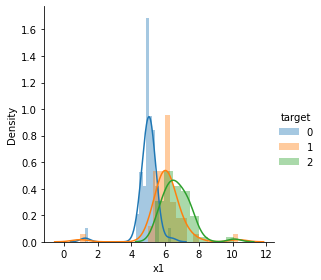

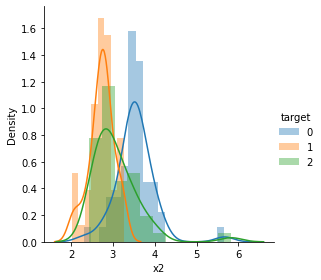


Alpha = 1.6
Sepal length
Mean 6.026613955936773 
Std 0.9693936175555719
Sepal width
Mean 3.1561172131831614 
Std 0.9693936175555719
           x1        x2  target
0    4.587090  3.961124       0
1    4.994875  3.603147       0
2    5.261081  3.581185       0
3    5.154094  3.624667       0
4    4.834161  3.768570       0
..        ...       ...     ...
145  5.901412  3.236583       2
146  7.312618  2.655402       2
147  6.653886  3.819453       2
148  6.376465  2.604520       2
149  7.442994  2.572758       2

[150 rows x 3 columns]


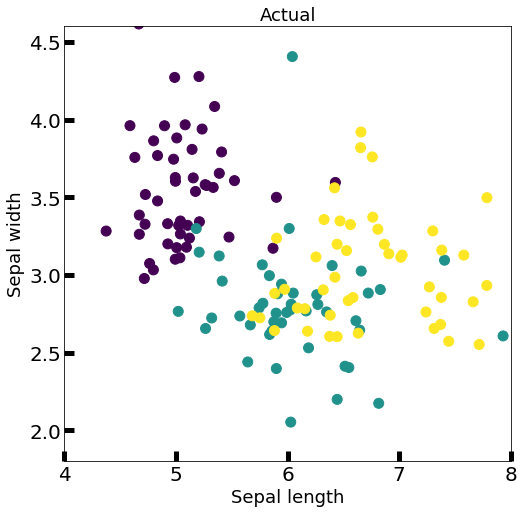

C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\

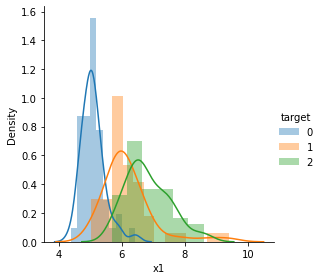

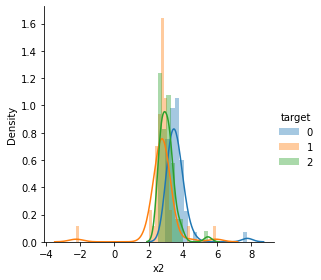


Alpha = 1.5
Sepal length
Mean 5.876529606870249 
Std 0.9922831034612907
Sepal width
Mean 3.168275418096467 
Std 0.9922831034612907
           x1        x2  target
0    4.771504  3.180585       0
1    4.468049  3.404177       0
2    5.026796  5.670650       0
3    4.998406  4.077690       0
4    5.175334  3.419901       0
..        ...       ...     ...
145  6.458982  2.545115       2
146  5.537513  3.178940       2
147  7.188830  3.594239       2
148  8.345250  2.856989       2
149  6.712883  3.093191       2

[150 rows x 3 columns]


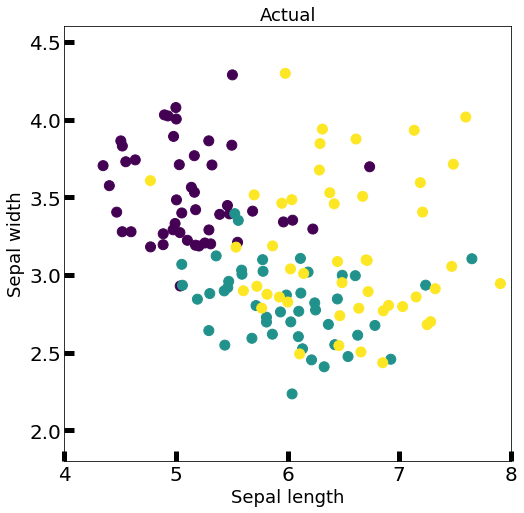

C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Divyesh\Anaconda3\envs\env0\lib\site-packages\seaborn\

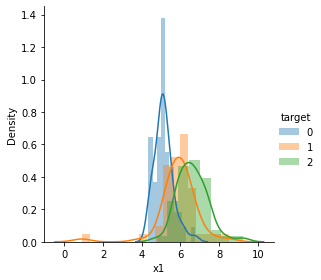

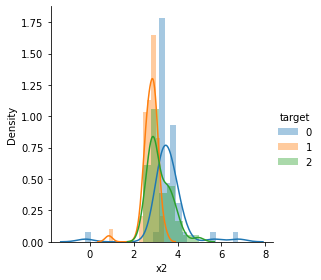

In [ ]:
import seaborn as sns
n_components = 3
theta_sl = {}
theta_sw = {}

i = 0
j = 0
for i in range(n_components):
    for j in range(2):
        j += 1
        if j == 1:
            theta_sl[i] = np.asarray(rstable.stable_fit(sl[i]))
        else:
            theta_sw[i] = np.asarray(rstable.stable_fit(sw[i]))
            
            
alpha = 2
features = 2
n_samples= iris_df.shape[0]
pt = n_samples/ n_components
X_alpha = {}     # X_alpha is the dictionary of new alpha 
sl_alpha_data = {}
sw_alpha_data = {}

X_alpha[alpha] = iris_df

for i in range(6):     #generate 5 new datasets
        print( f'\nAlpha = {alpha}')
        print('Sepal length\nMean', X_alpha[alpha]['x1'].mean(),'\nStd', X_alpha[alpha]['x1'].std())#, '\n',sl_alpha19_data)
        print('Sepal width\nMean', X_alpha[alpha]['x2'].mean(),'\nStd', X_alpha[alpha]['x1'].std())#, '\n',sw_alpha19_data
        print(X_alpha[alpha])
                    
        plt.rcParams['figure.figsize'] = (8,8)
        plt.scatter(X_alpha[alpha]['x1'] ,X_alpha[alpha]['x2'] , c=X_alpha[alpha].target, s=100, zorder=2)
        plt.xlabel('Sepal length', fontsize=18)
        plt.ylabel('Sepal width', fontsize=18)
        plt.tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
        plt.title('Actual', fontsize=18)
        plt.xlim([4, 8])
        plt.ylim([1.8,4.6])
        plt.show()
        sns.FacetGrid(X_alpha[alpha],hue="target",size=4).map(sns.distplot,"x1").add_legend()
        sns.FacetGrid(X_alpha[alpha],hue="target",size=4).map(sns.distplot,"x2").add_legend()
        plt.show()

        
        alpha -= 0.1
        alpha = round(alpha,2)
        clusters = []    
        for k in range(3):
            sl_alpha_data[k] = np.asarray(rstable.rstable(pt, alpha, theta_sl[k][1], theta_sl[k][2], theta_sl[k][3])) 
            # beta_sl, gamma_sl, delta_sl
            sw_alpha_data[k] = np.asarray(rstable.rstable(pt, alpha, theta_sw[k][1], theta_sw[k][2], theta_sw[k][3])) 
            # beta_sw, gamma_sw, delta_sw
            cluster = {'x1' : sl_alpha_data[k], 'x2': sw_alpha_data[k], 
                       'target': np.array([ k for s in range(len(sl_alpha_data[k]))])}

            clusters.append(pd.DataFrame.from_dict(cluster))

        X_alpha[alpha] = clusters[0].append(clusters[1]).append(clusters[2]).set_index(pd.Series([i for i in range(n_samples)]))
        
        